In [1]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
daily_kpis = pd.read_csv(
    "../data/kpi/daily_kpis.csv",
    parse_dates=["date"]
)

daily_kpis = daily_kpis.sort_values("date")
daily_kpis.head()


,date,revenue,orders,customers,quantity,aov
0,2010-12-01,46376.49,121,95,24215,383.276777
1,2010-12-02,47316.53,137,99,31142,345.376131
2,2010-12-03,23921.71,57,50,11839,419.679123
3,2010-12-05,31771.60,87,75,16449,365.190805
4,2010-12-06,31215.64,94,82,16291,332.081277


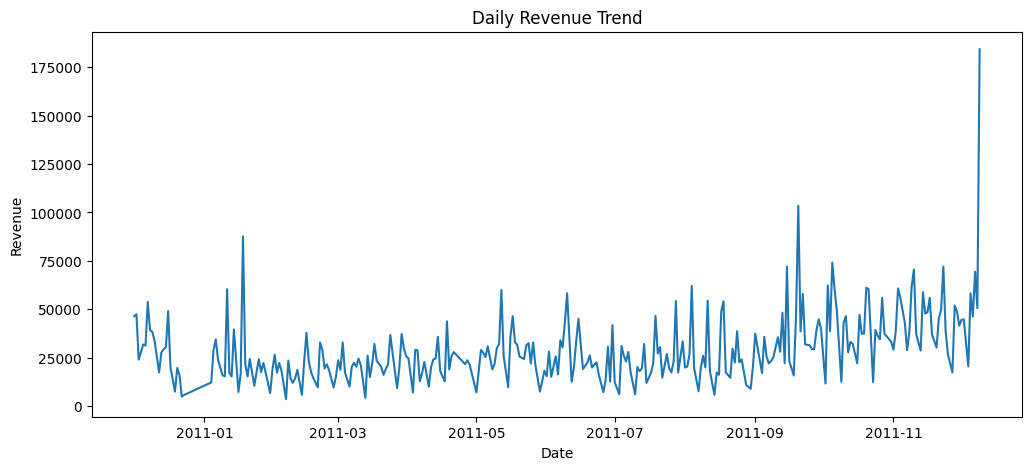

In [4]:
plt.figure(figsize=(12,5))
plt.plot(daily_kpis["date"], daily_kpis["revenue"])
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


In [5]:
FORECAST_DAYS = 14  # 2-week outlook


In [6]:
WINDOW = 7

daily_kpis["rolling_mean"] = (
    daily_kpis["revenue"]
    .rolling(WINDOW)
    .mean()
)

daily_kpis["rolling_std"] = (
    daily_kpis["revenue"]
    .rolling(WINDOW)
    .std()
)


In [7]:
last_mean = daily_kpis["rolling_mean"].iloc[-1]
last_std = daily_kpis["rolling_std"].iloc[-1]

future_dates = pd.date_range(
    start=daily_kpis["date"].iloc[-1] + pd.Timedelta(days=1),
    periods=FORECAST_DAYS
)

forecast_df = pd.DataFrame({
    "date": future_dates,
    "forecast_revenue": last_mean,
    "upper_bound": last_mean + 2 * last_std,
    "lower_bound": last_mean - 2 * last_std
})

forecast_df.head()


,date,forecast_revenue,upper_bound,lower_bound
0,2011-12-10,67665.542857,174834.437389,-39503.351674
1,2011-12-11,67665.542857,174834.437389,-39503.351674
2,2011-12-12,67665.542857,174834.437389,-39503.351674
3,2011-12-13,67665.542857,174834.437389,-39503.351674
4,2011-12-14,67665.542857,174834.437389,-39503.351674


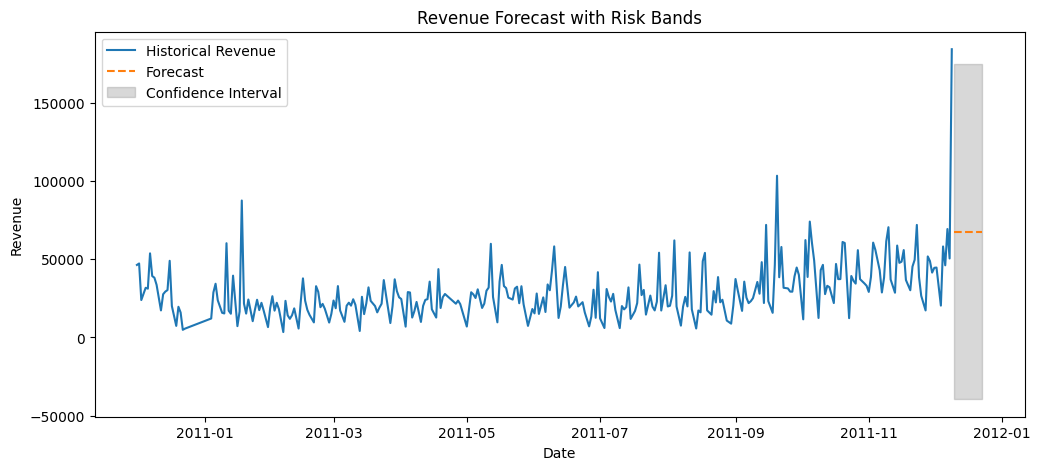

In [8]:
plt.figure(figsize=(12,5))

plt.plot(
    daily_kpis["date"],
    daily_kpis["revenue"],
    label="Historical Revenue"
)

plt.plot(
    forecast_df["date"],
    forecast_df["forecast_revenue"],
    label="Forecast",
    linestyle="--"
)

plt.fill_between(
    forecast_df["date"],
    forecast_df["lower_bound"],
    forecast_df["upper_bound"],
    color="gray",
    alpha=0.3,
    label="Confidence Interval"
)

plt.title("Revenue Forecast with Risk Bands")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()


In [9]:
baseline = daily_kpis["revenue"].mean()

forecast_df["risk_flag"] = (
    forecast_df["lower_bound"] < baseline * 0.9
)

forecast_df[forecast_df["risk_flag"]]


,date,forecast_revenue,upper_bound,lower_bound,risk_flag
0,2011-12-10,67665.542857,174834.437389,-39503.351674,True
1,2011-12-11,67665.542857,174834.437389,-39503.351674,True
2,2011-12-12,67665.542857,174834.437389,-39503.351674,True
3,2011-12-13,67665.542857,174834.437389,-39503.351674,True
4,2011-12-14,67665.542857,174834.437389,-39503.351674,True
5,2011-12-15,67665.542857,174834.437389,-39503.351674,True
6,2011-12-16,67665.542857,174834.437389,-39503.351674,True
7,2011-12-17,67665.542857,174834.437389,-39503.351674,True
8,2011-12-18,67665.542857,174834.437389,-39503.351674,True
9,2011-12-19,67665.542857,174834.437389,-39503.351674,True


In [10]:
from src.forecasting import forecast_kpi

forecast_test = forecast_kpi(
    daily_kpis,
    value_col="revenue"
)

forecast_test.head()


,date,forecast,upper,lower
0,2011-12-10,67665.542857,174834.437389,-39503.351674
1,2011-12-11,67665.542857,174834.437389,-39503.351674
2,2011-12-12,67665.542857,174834.437389,-39503.351674
3,2011-12-13,67665.542857,174834.437389,-39503.351674
4,2011-12-14,67665.542857,174834.437389,-39503.351674


In [11]:
forecast_df.to_csv(
    "../data/kpi/revenue_forecast.csv",
    index=False
)
